In [1]:
import numpy as np 
import re 
import nltk.corpus
import nltk.stem
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer


In [2]:
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
twenty_test= fetch_20newsgroups(subset='test',shuffle=True)
data=fetch_20newsgroups(subset="all",
                        remove=('headers','footers','quotes'),
                        shuffle=True,random_state=1)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(11314, 130107)

In [4]:
import nltk
nltk.download()

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

stemmed_count_vect = StemmedCountVectorizer(stop_words='english')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

text_clf_svm = Pipeline([('vect',stemmed_count_vect),
                      ('tfidf', TfidfTransformer()),
                      ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                                 alpha=1e-3, n_iter=5, random_state=50)),])
#clf_svm= text_clf_svm.fit(twenty_train.data, twenty_train.target)


/home/taibui/.local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [42]:
predicted_svm = text_clf_svm.predict(twenty_test.data)
np.mean(predicted_svm == twenty_test.target)

0.82036643653744024

In [6]:
from sklearn.model_selection import cross_val_score 
k=10
print "SVM 10-Cross Validation Score:",
score=cross_val_score(text_clf_svm, twenty_train.data, twenty_train.target, cv=k, scoring='accuracy')
score

SVM 10-Cross Validation Score:

array([ 0.88508772,  0.89455185,  0.88752197,  0.87764085,  0.89222615,
        0.8768822 ,  0.88741135,  0.89076377,  0.89679715,  0.8824577 ])

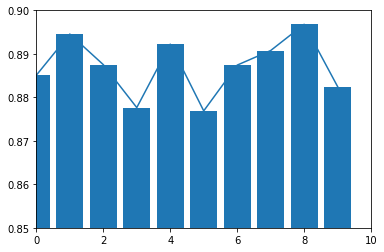

In [7]:
import matplotlib.pyplot as plt 
index=range(0,10)
plt.plot([score[i] for i in range(0,10)])
plt.axis([0,10 ,0.85,0.9])
plt.bar(index,[score[i] for i in range(0,10)])
plt.show()

In [8]:
score.mean()


0.88713406917877635

SVM 10-Cross Validation Score:

0.75760213650591335